In [1]:
from quadrics import *
import scipy.stats as ss

Using TensorFlow backend.


In [2]:
rus_file = open('assoc_net.txt')
rus_graph, rus_dict = graph_from_file(rus_file)

In [3]:
our_eigenvalues = []
thresholds = [0, 0.005, 0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.15, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.75, 0.8, 0.9, 0.93, 0.96, 1.0]
for threshold in thresholds:
    print(threshold)
    matr = rus_graph.laplace_matrix(min_weight=threshold)
    our_eigenvalues.append(eig_fast(matr))

0






0.005
0.01
0.02
0.05
0.07
0.09
0.1
0.15
0.2
0.3
0.4
0.45
0.5
0.55
0.6
0.7
0.75
0.8
0.9
0.93
0.96
1.0


In [4]:
our_eigenvalues = list(map(lambda n: list(n), our_eigenvalues))
f = open('comp-spectr-rus.txt', 'w')
print(our_eigenvalues, file=f)
f.close()

In [5]:
from numpy import array, float16
f = open('comp-spectr-rus.txt')
our_eigenvalues = eval(f.read())

In [6]:
our_eigenvalues = list(map(lambda li: list(map(complex, li)), our_eigenvalues))
our_eigenvalues = list(map(lambda li: list(map(lambda x: x.real, li)), our_eigenvalues))

In [7]:
for elem1 in our_eigenvalues:
    for elem2 in our_eigenvalues:
        print(ss.wasserstein_distance(elem1, elem2), end=' ')
    print()
    print()

0.0 0.48171884849757046 1.0825978847096536 4.364519857112831 12.197310359319154 14.508632765987207 15.783252784198304 16.197222805911544 17.53073124606002 18.254377670378844 19.17692792603478 19.825506058695687 20.10973944105892 20.36889752749164 20.63793163829923 20.891976605729347 21.377337675982186 21.586730405547215 21.77598585136916 22.060254255095423 22.125323947607853 22.181638299362422 22.239913847446754 

0.48171884849757046 0.0 0.600879036212083 3.882801008615261 11.715591510821582 14.026913917489633 15.301533935700734 15.715503957413972 17.04901239756245 17.772658821881272 18.69520907753721 19.343787210198116 19.628020592561356 19.88717867899407 20.156212789801657 20.410257757231776 20.895618827484615 21.105011557049643 21.294267002871585 21.578535406597855 21.64360509911028 21.699919450864854 21.758194998949186 

1.0825978847096536 0.600879036212083 0.0 3.281921972403178 11.114712474609501 13.426034881277552 14.700654899488647 15.114624921201887 16.448133361350365 17.171779

22.060254255095423 21.578535406597855 20.977656370385773 17.695734397982594 9.86294389577627 7.551621489108219 6.277001470897122 5.863031449183882 4.529523009035406 3.805876584716579 2.883326329060645 2.2347481963997358 1.9505148140365005 1.6913567276037837 1.4223226167961989 1.1682776493660758 0.6829165791132392 0.4735238495482107 0.2842684037262654 0.0 0.065069692512431 0.12138404426699967 0.17965959235133033 

22.125323947607853 21.64360509911028 21.042726062898204 17.760804090495025 9.928013588288703 7.61669118162065 6.342071163409553 5.928101141696314 4.594592701547837 3.8709462772290104 2.948396021573076 2.299817888912167 2.0155845065489313 1.7564264201162145 1.4873923093086296 1.233347341878507 0.7479862716256702 0.5385935420606417 0.3493380962386964 0.065069692512431 0.0 0.05631435175456867 0.11458989983889933 

22.181638299362422 21.699919450864854 21.09904041465277 17.817118442249594 9.984327940043272 7.673005533375219 6.398385515164121 5.984415493450882 4.650907053302406 3.9

In [8]:
import matplotlib.pyplot as plt

def plot(i, show=True):
    dists = [ss.wasserstein_distance(our_eigenvalues[i], our_eigenvalues[j]) for j in range(len(thresholds))]
    if show:
        plt.figure(figsize=(15, 15))
    plt.plot(thresholds, dists, label='threshold=' + str(thresholds[i]))
    plt.legend(loc='upper left')
    if show:
        plt.show()

    
#plot(0)

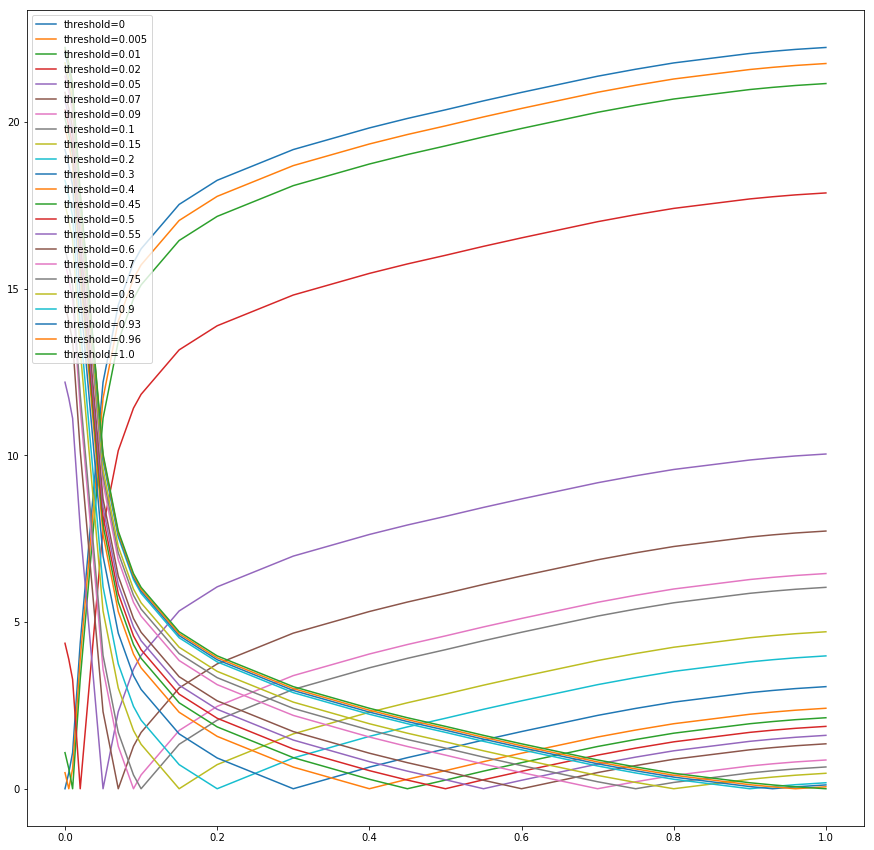

In [9]:
plt.figure(figsize=(15, 15))
for i in range(0, len(thresholds), 1):
    plot(i, show=False)
plt.show()

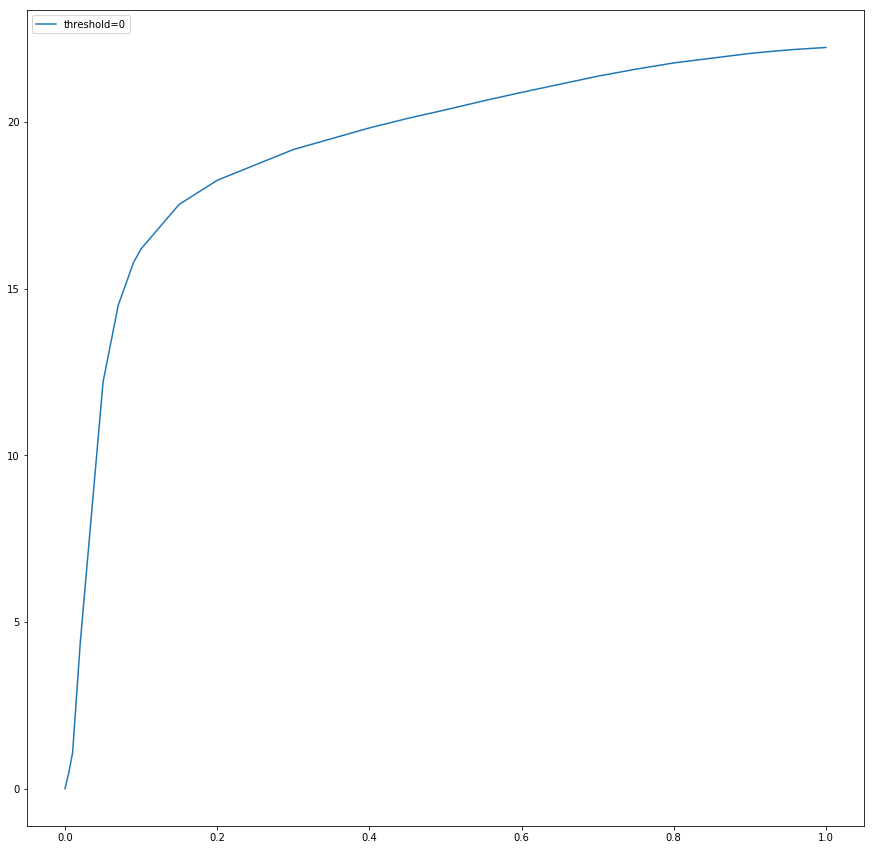

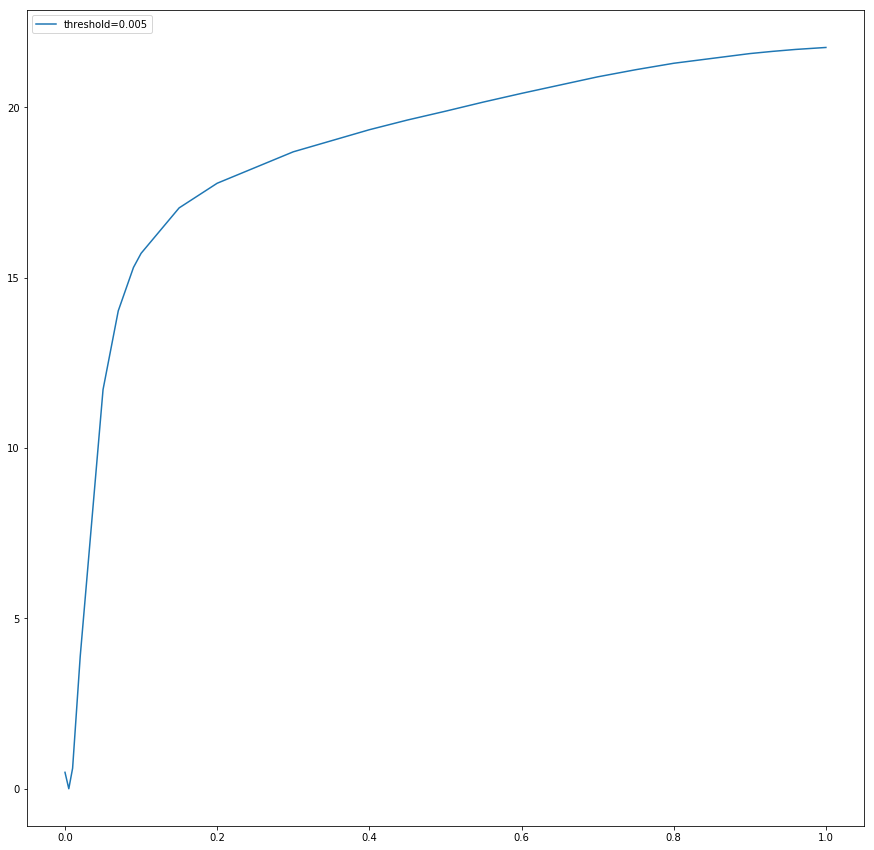

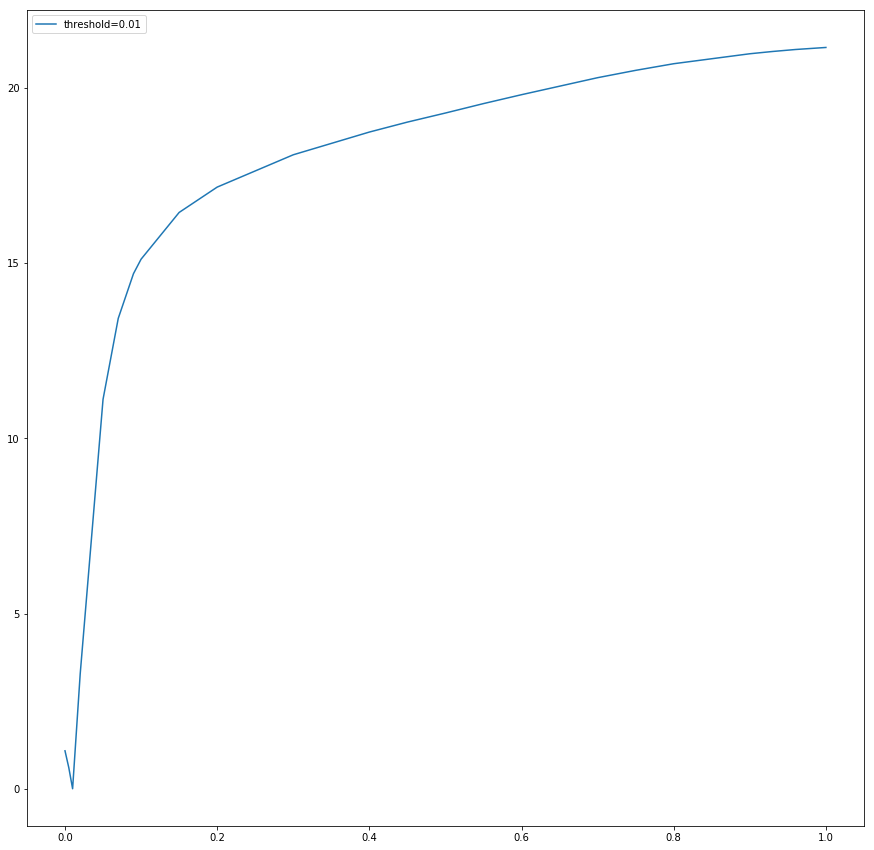

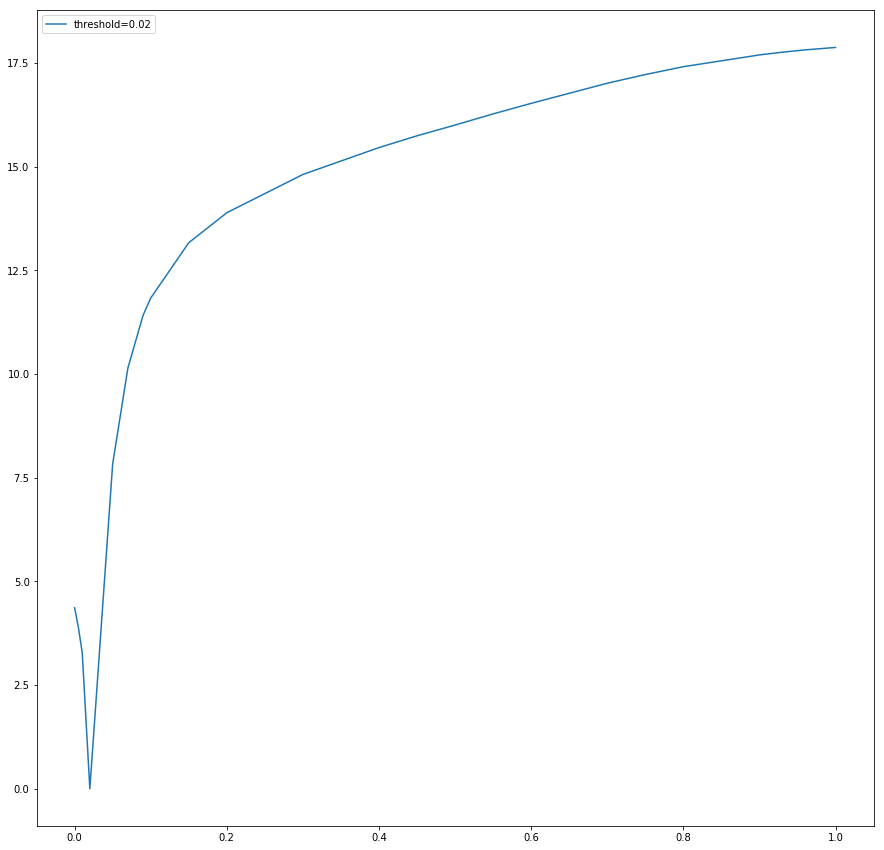

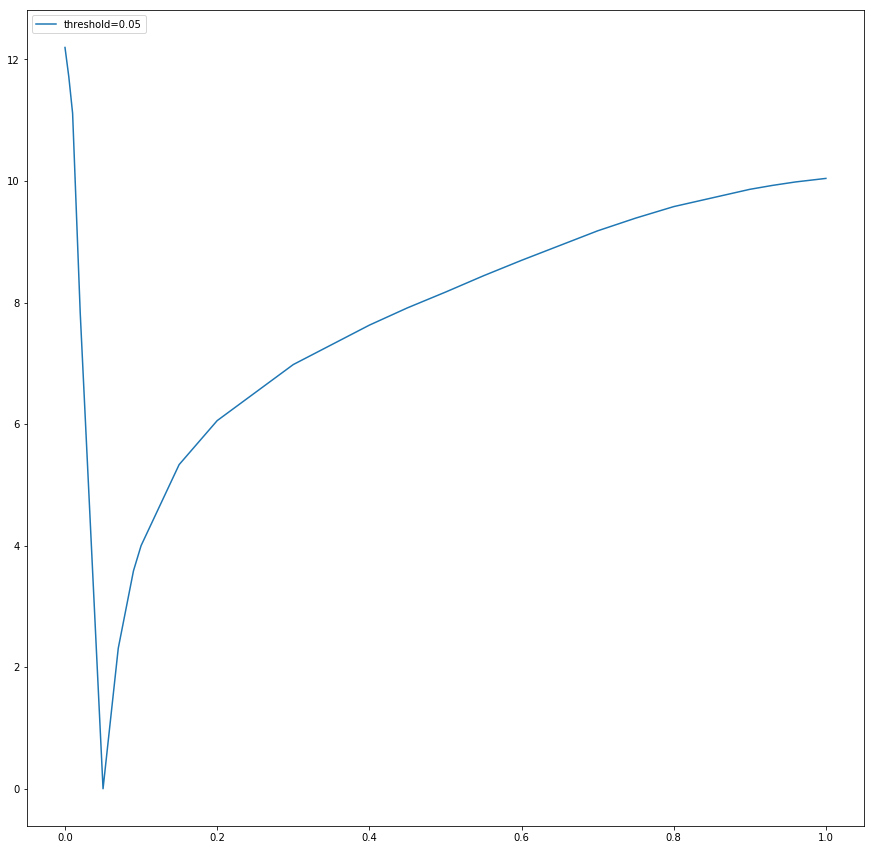

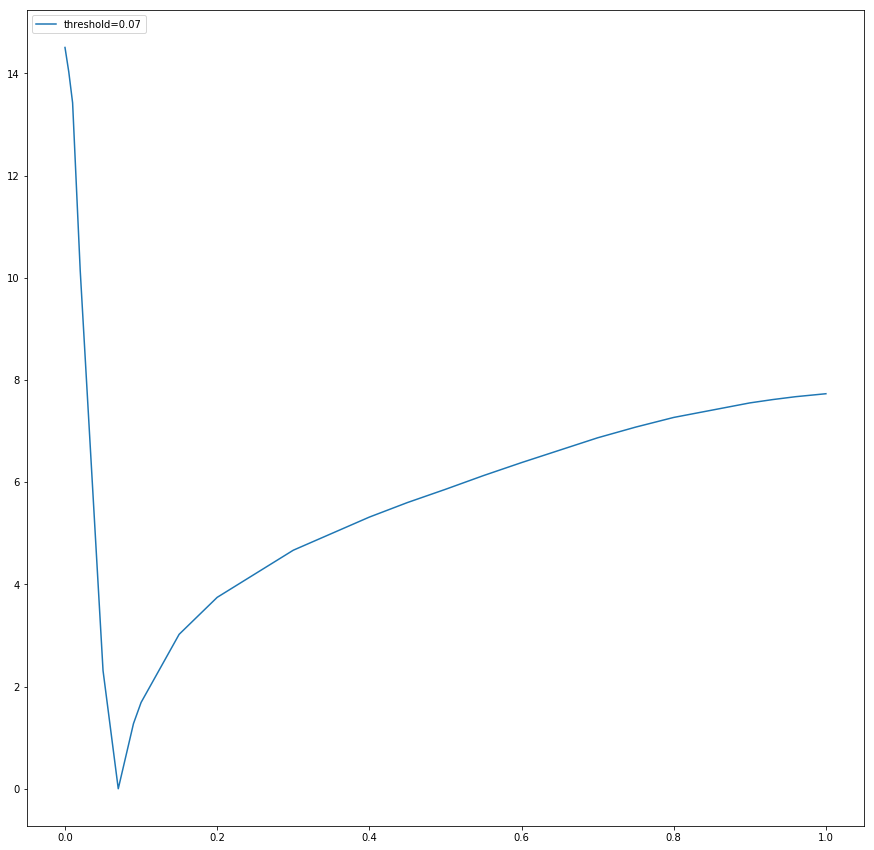

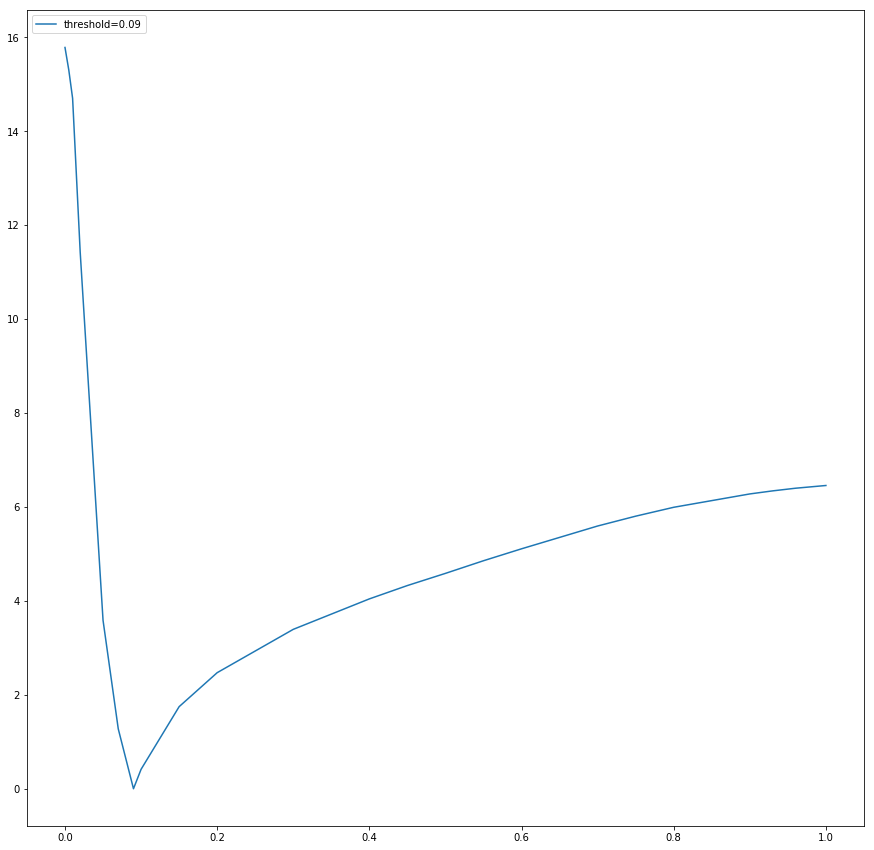

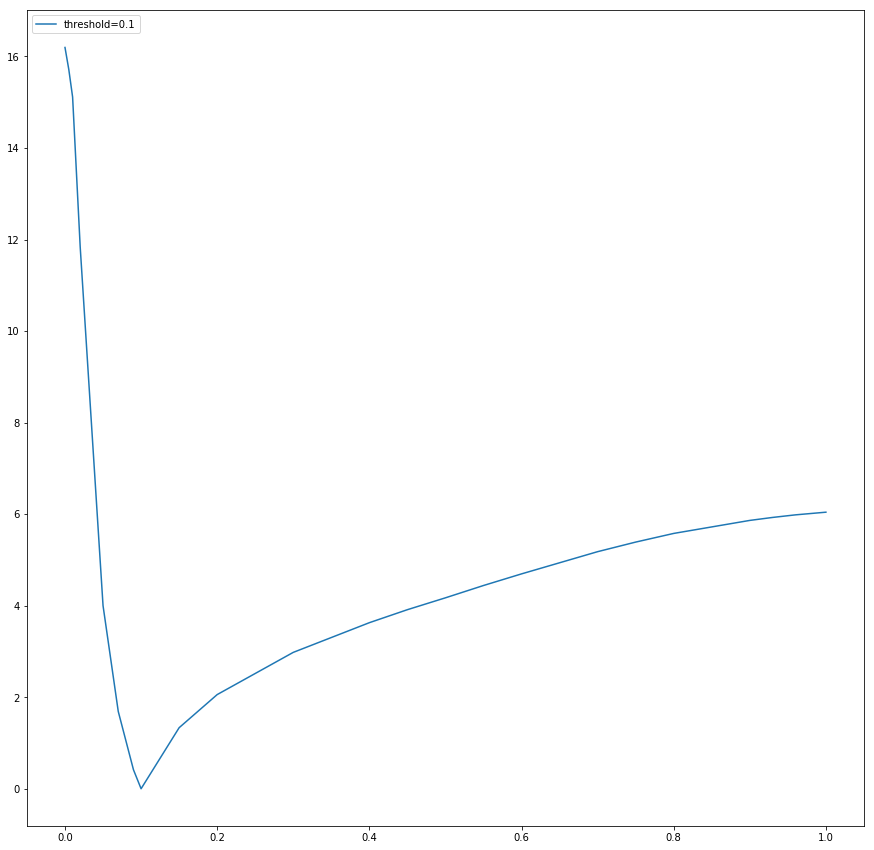

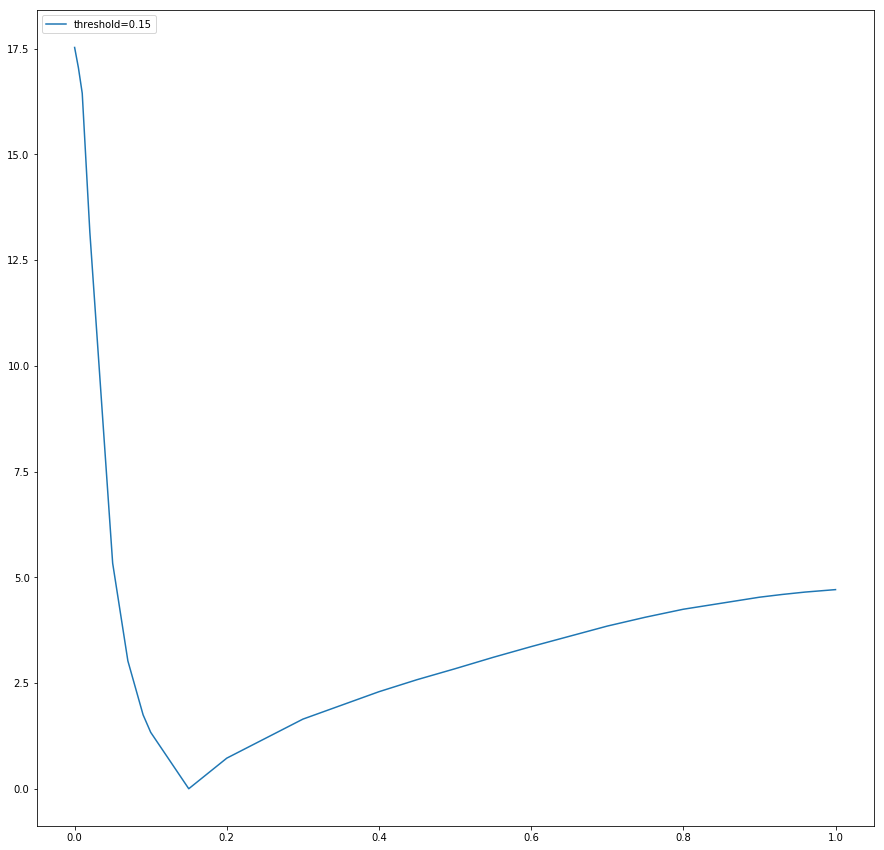

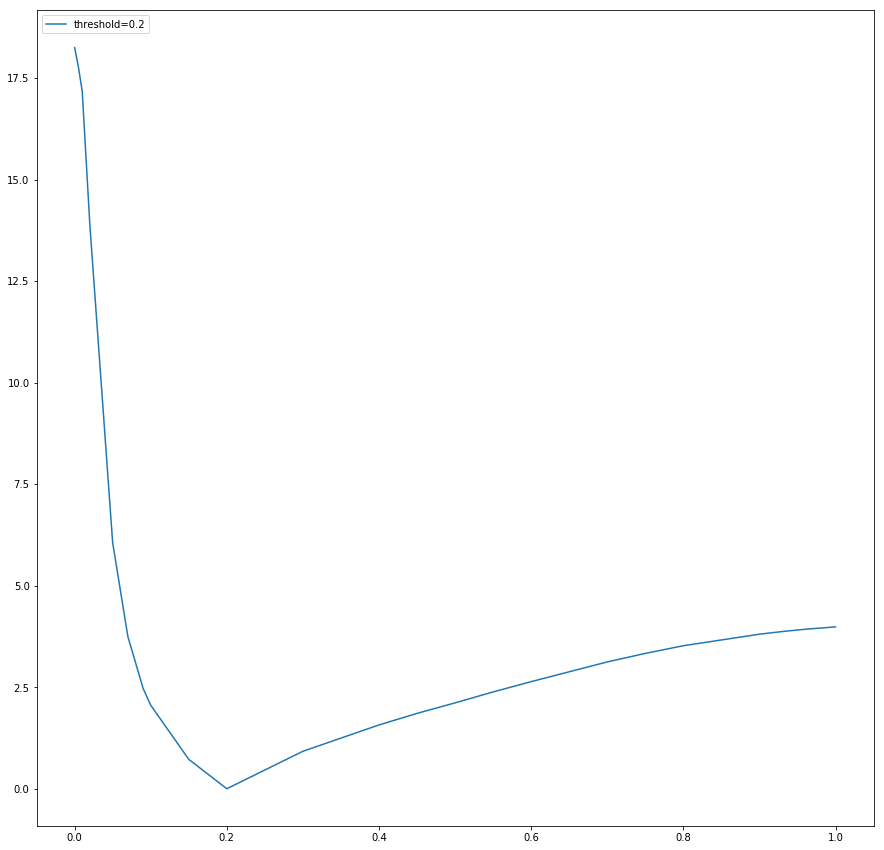

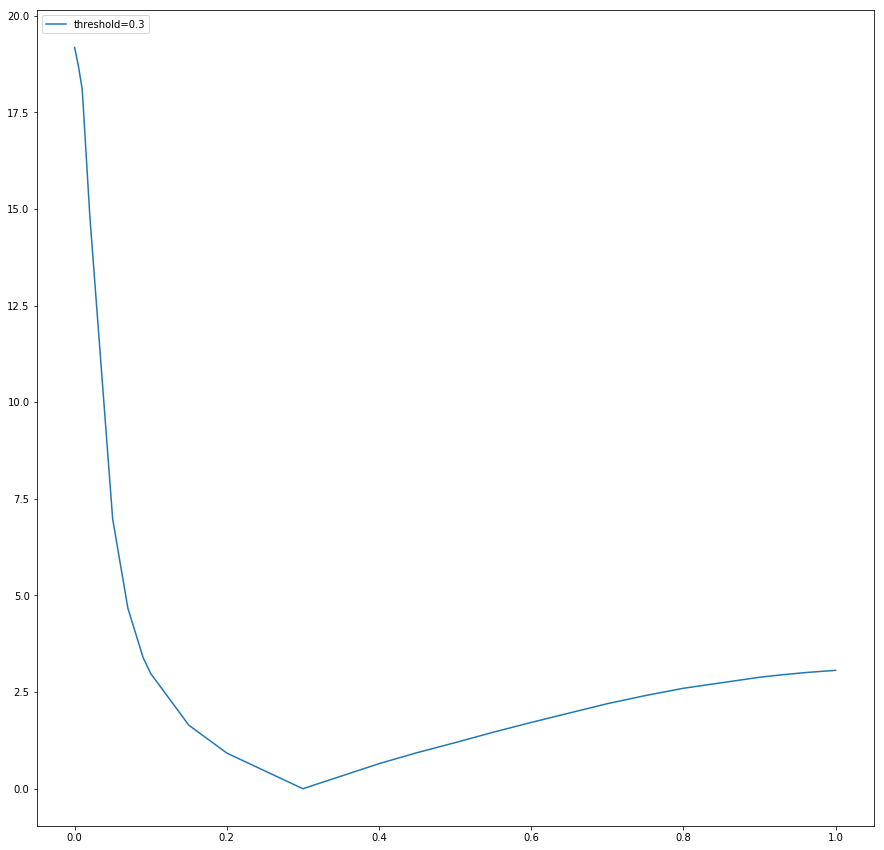

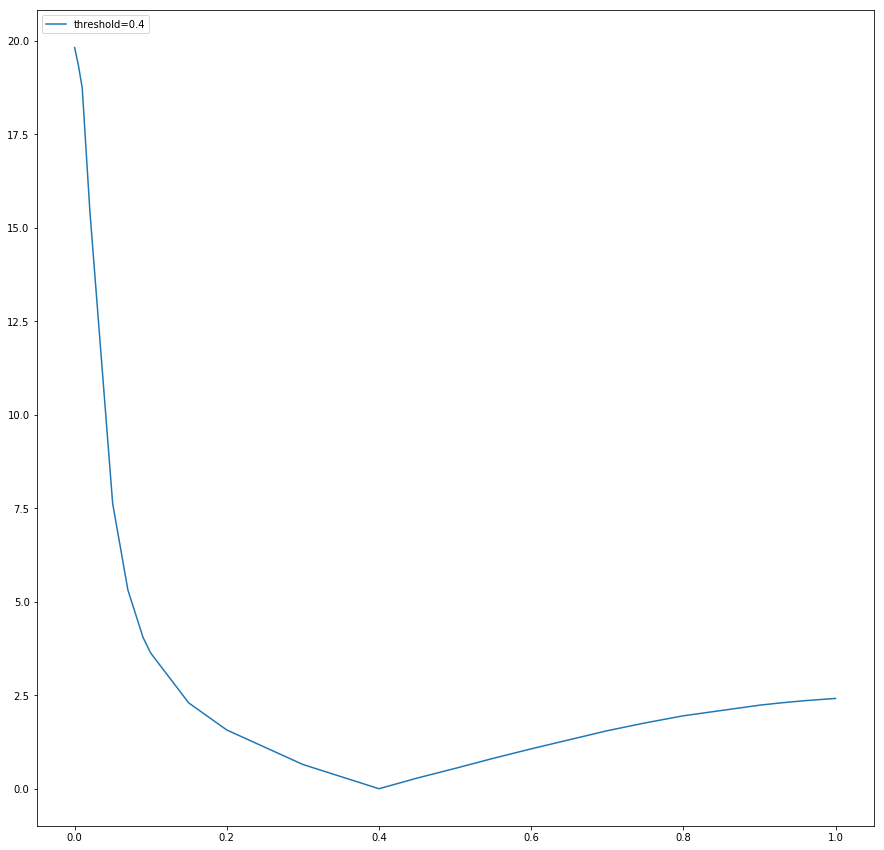

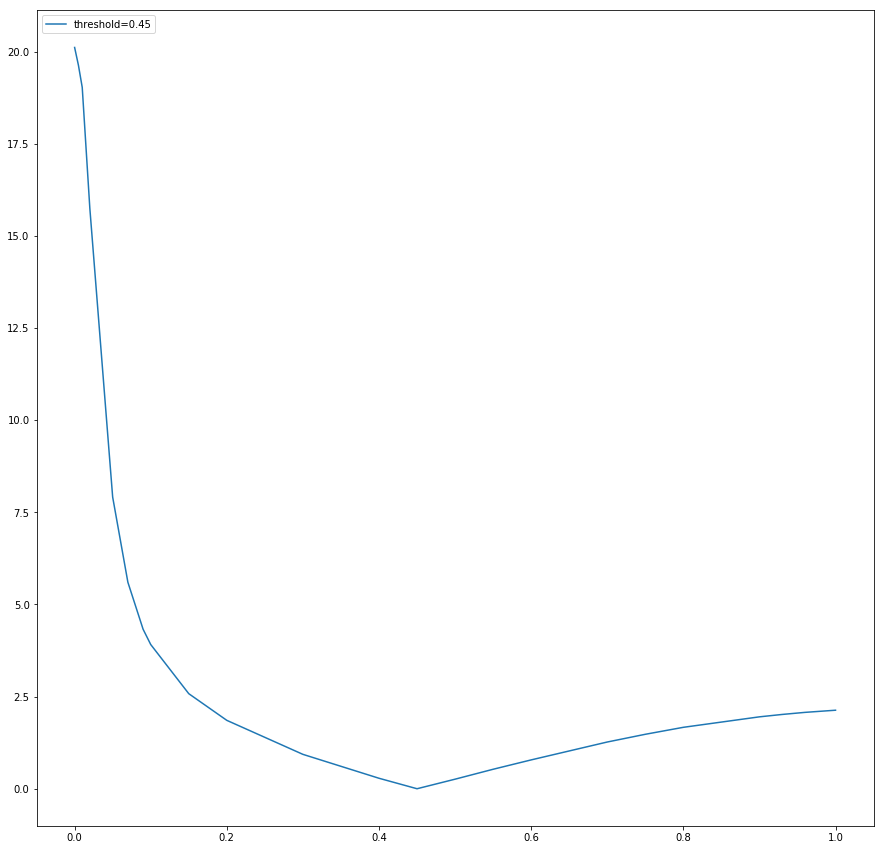

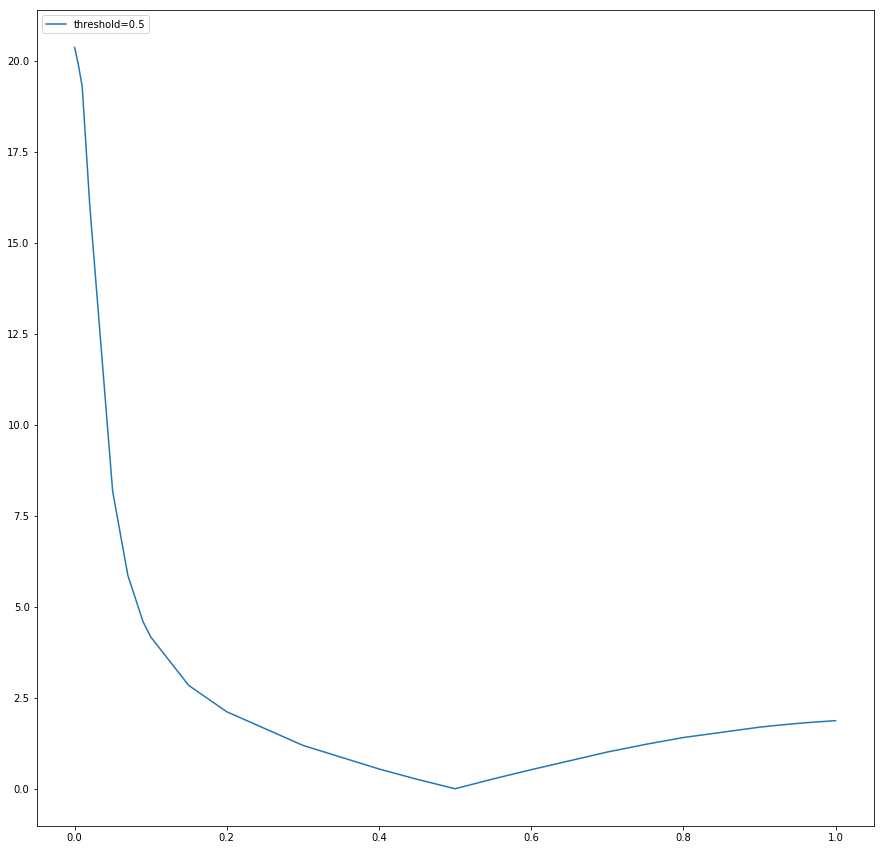

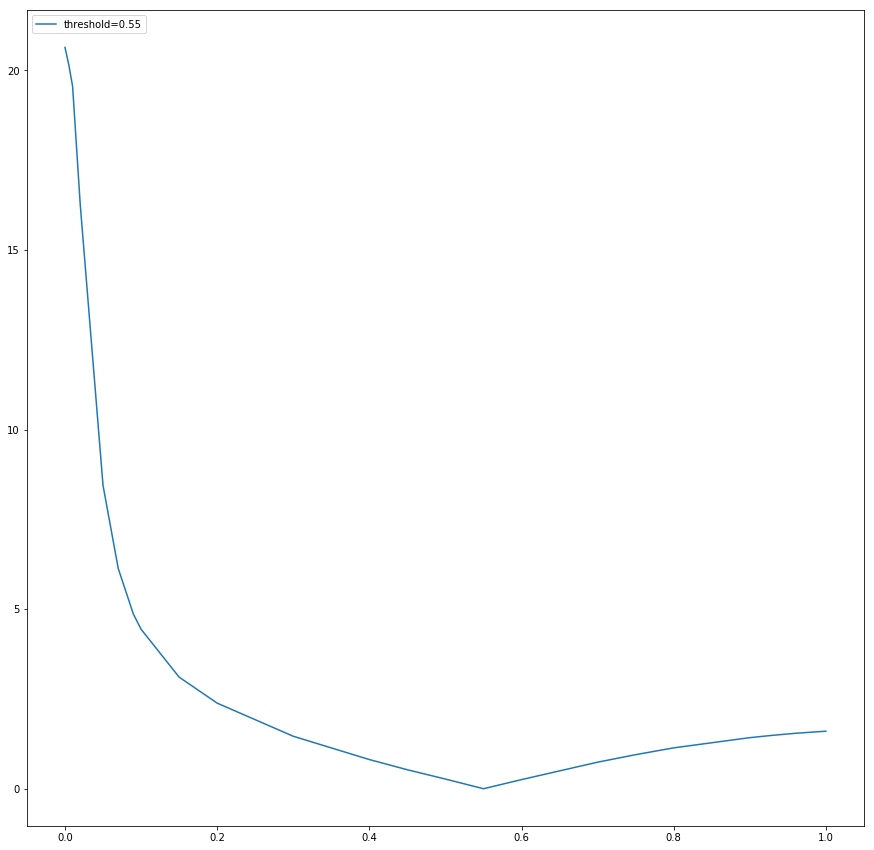

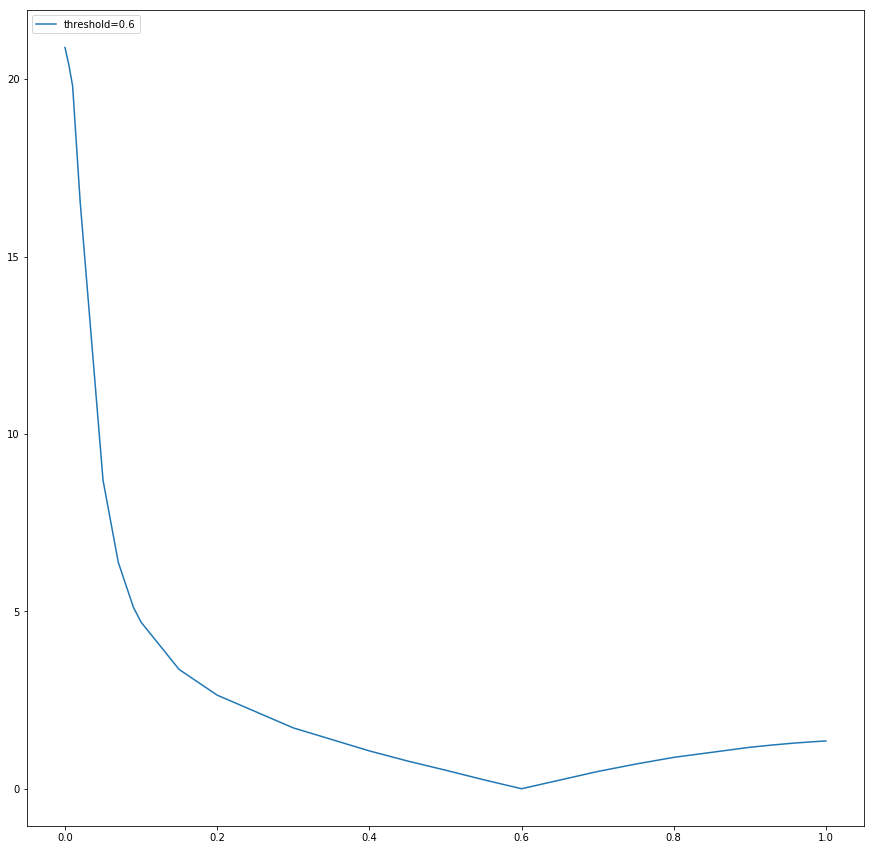

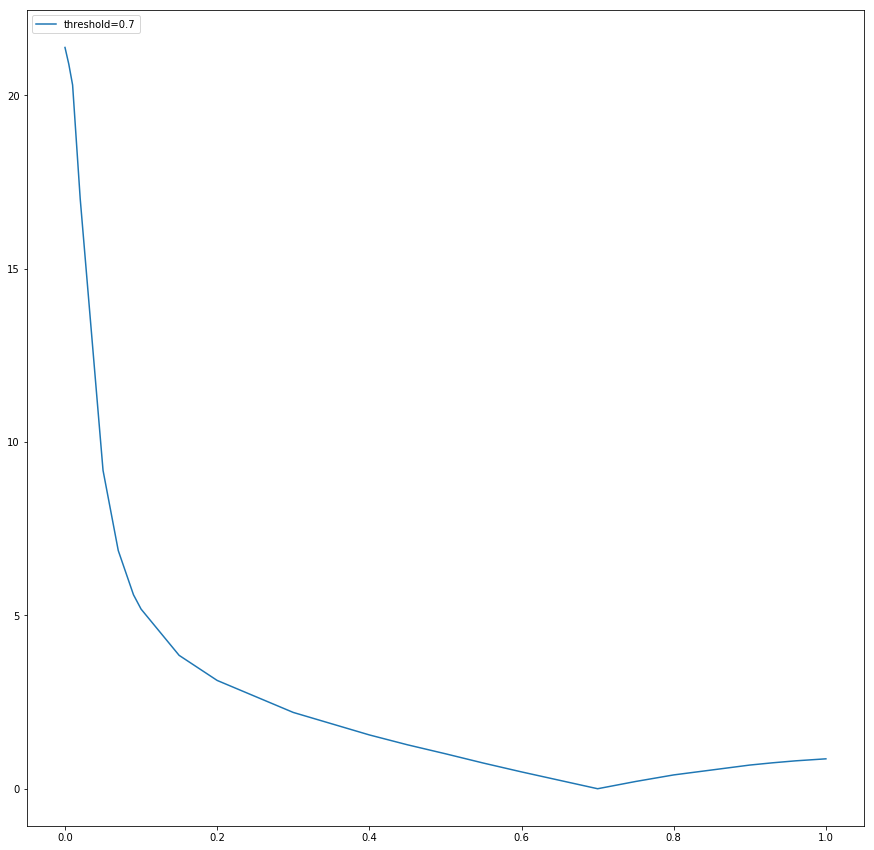

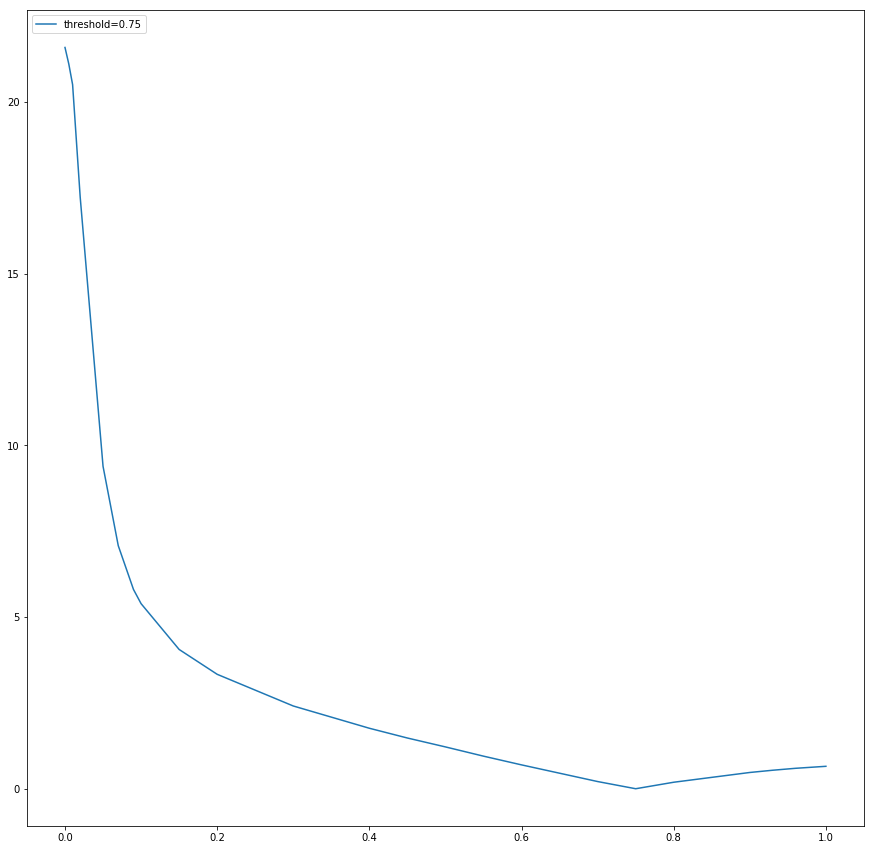

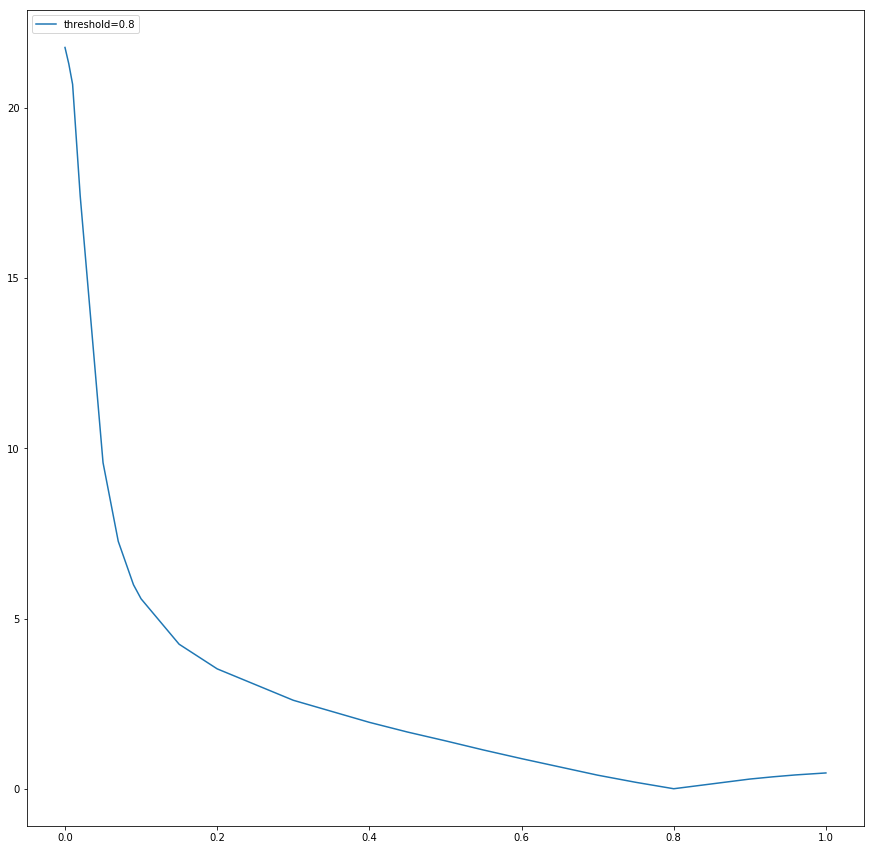

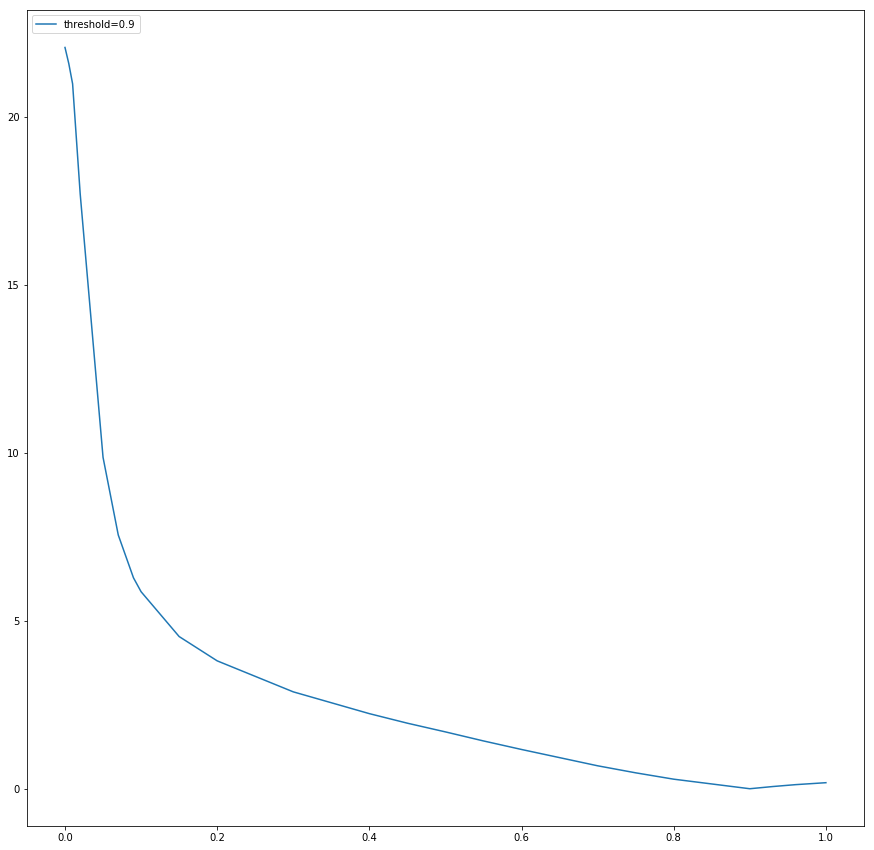

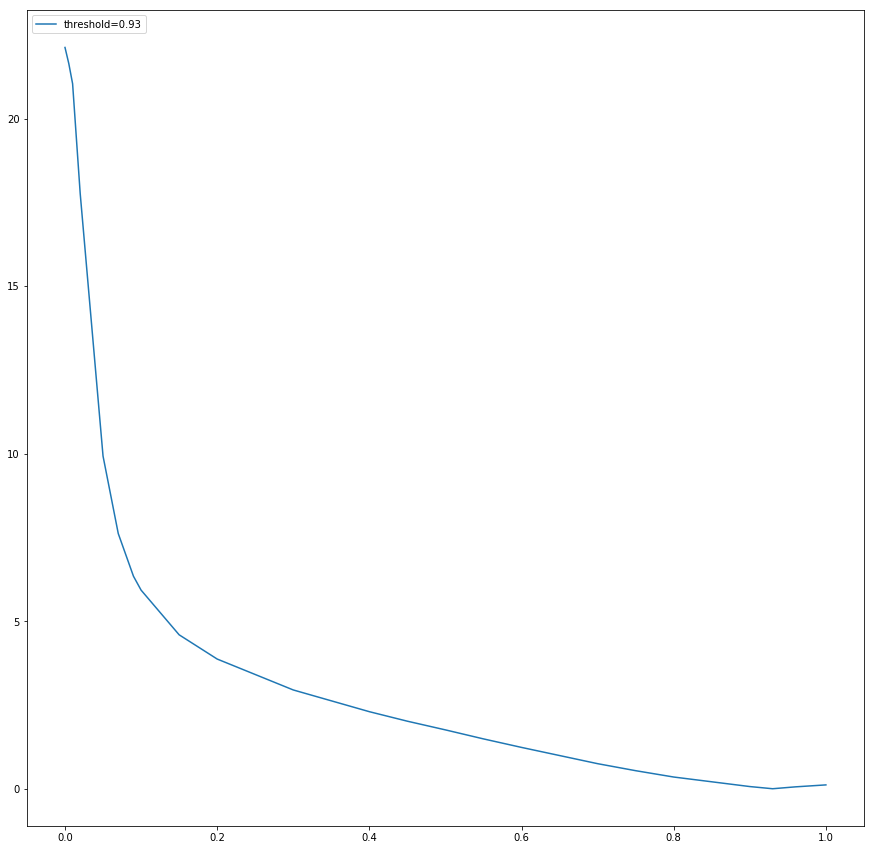

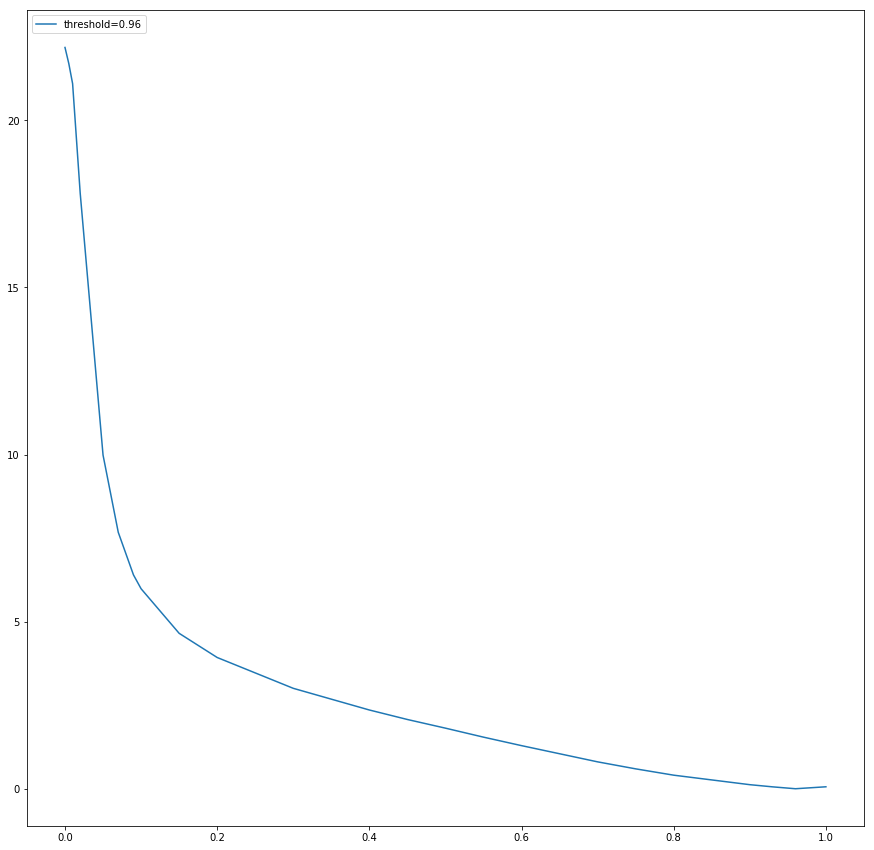

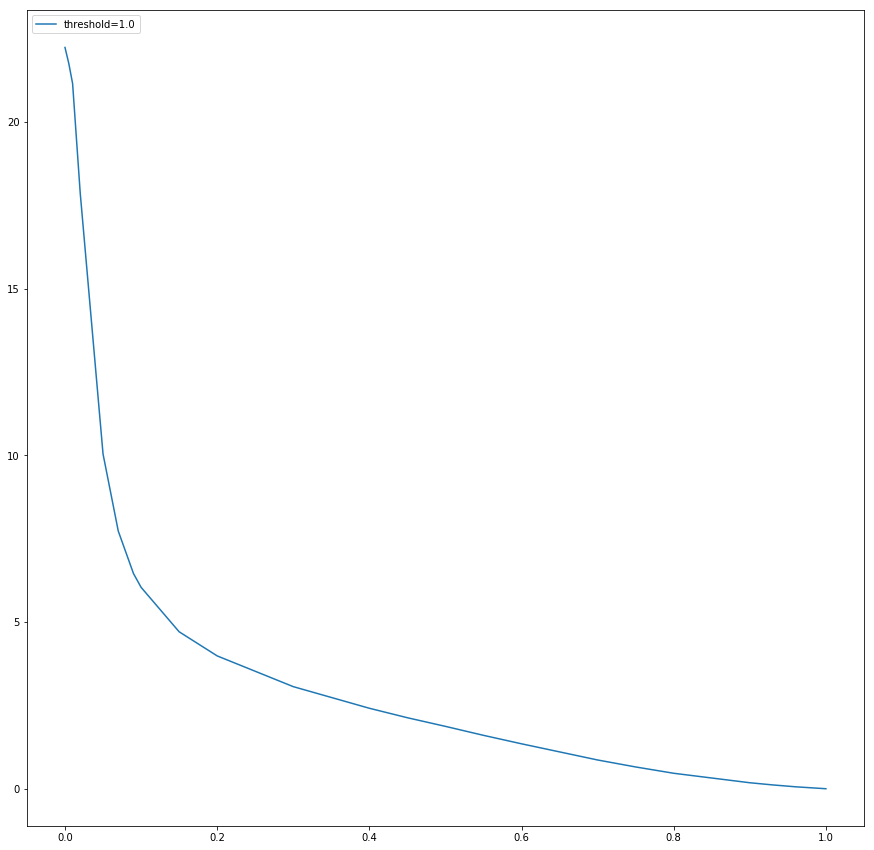

In [10]:
for i in range(len(thresholds)):
    plot(i)